## 1) Dataset Walkthrough

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/geeksforgeeks-articles/articles.csv')

/kaggle/input/geeksforgeeks-articles/articles.csv


In [2]:
df.isnull().sum()

title            0
author_id       19
last_updated    18
link             0
category         0
dtype: int64

#### As you can see we're having 19 null vlaues in author_id and 18 in last_update so lets delete these rows.

In [3]:
df.dropna(inplace = True)

In [4]:
df.isnull().sum()

title           0
author_id       0
last_updated    0
link            0
category        0
dtype: int64

In [5]:
df.head()

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy


## 2.1) Finding the most popular author (in terms of the number of articles)

In [6]:
df.groupby('author_id').size().sort_values(ascending = False).head()

author_id
GeeksforGeeks    11957
ManasChhabra2      317
Striver            265
manjeet_04         246
Chinmoy Lenka      192
dtype: int64

## 2.2) Day-wise Analysis of Articles Frequency

In [7]:
df = df[df['last_updated'] != 'Easy']
df = df[df['last_updated'] != 'Basic']
df = df[df['last_updated'] != 'Medium']
df = df[df['last_updated'] != 'Hard']
df = df[df['last_updated'] != 'Expert']

data = df.values


day   = []
month = []
year  = []

for i in range(len(data)):
    day.append(int(data[i][2].split(' ')[0]))
    month.append(data[i][2].split(' ')[1][:-1])
    year.append(int(data[i][2].split(' ')[2]))
    
df['day']   = day
df['month'] = month
df['year']  = year

In [8]:
df.head()

,title,author_id,last_updated,link,category,day,month,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022


<AxesSubplot:xlabel='day'>

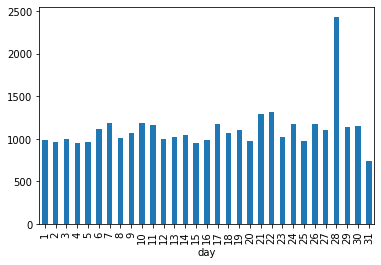

In [9]:
df.groupby('day').size().plot(kind = 'bar')

## 2.3) Month-wise Analysis of Articles Frequency

<AxesSubplot:xlabel='month'>

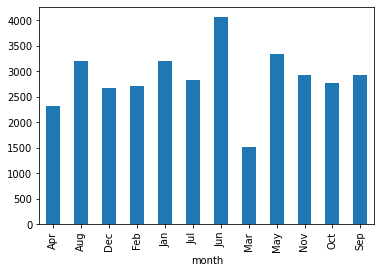

In [10]:
df.groupby('month').size().plot(kind = 'bar')

## 2.4) Year-wise Analysis of Articles Frequency

<AxesSubplot:xlabel='year'>

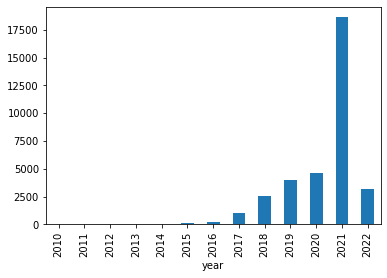

In [11]:
df.groupby('year').size().plot(kind = 'bar')

## 2.5) Finding articles of your favorite Author

In [12]:
df[df['author_id'] == 'Chinmoy Lenka']

,title,author_id,last_updated,link,category,day,month,year
2786,Puzzle | Probability of finding a job,Chinmoy Lenka,"16 Dec, 2019",https://www.geeksforgeeks.org/puzzle-probabili...,easy,16,Dec,2019
2787,Puzzle | King Octopus and Servants,Chinmoy Lenka,"16 Dec, 2019",https://www.geeksforgeeks.org/puzzle-king-octo...,easy,16,Dec,2019
2788,Puzzle | How long was he walking,Chinmoy Lenka,"16 Dec, 2019",https://www.geeksforgeeks.org/puzzle-how-long-...,easy,16,Dec,2019
2799,Puzzle | Rope Escape,Chinmoy Lenka,"13 Dec, 2019",https://www.geeksforgeeks.org/puzzle-rope-escape/,easy,13,Dec,2019
2828,System.out.println in Java,Chinmoy Lenka,"28 Nov, 2019",https://www.geeksforgeeks.org/system-out-print...,easy,28,Nov,2019
...,...,...,...,...,...,...,...,...
31059,Hashtable size() Method in Java,Chinmoy Lenka,"28 Jun, 2018",https://www.geeksforgeeks.org/hashtable-size-m...,hard,28,Jun,2018
31069,PriorityQueue toArray() Method in Java,Chinmoy Lenka,"10 Dec, 2018",https://www.geeksforgeeks.org/priorityqueue-to...,hard,10,Dec,2018
34237,Calendar get() method in Java with Examples,Chinmoy Lenka,"14 Feb, 2019",https://www.geeksforgeeks.org/calendar-get-met...,expert,14,Feb,2019
34338,PriorityQueue offer() Method in Java,Chinmoy Lenka,"10 Dec, 2018",https://www.geeksforgeeks.org/priorityqueue-of...,expert,10,Dec,2018


## 2.6) Finding articles based on tags(like python)

In [13]:
tag = 'scipy'.lower()

data = df.values


for i in range(len(data)):
    if tag in data[i][0].lower():
        print(data[i][0], data[i][3])

SciPy – Input and Output https://www.geeksforgeeks.org/scipy-input-and-output/
Data Analysis with SciPy https://www.geeksforgeeks.org/data-analysis-with-scipy/
SciPy | Curve Fitting https://www.geeksforgeeks.org/scipy-curve-fitting/
SciPy – Sparse Matrix Multiplication https://www.geeksforgeeks.org/scipy-sparse-matrix-multiplication/
SciPy – Integration https://www.geeksforgeeks.org/scipy-integration/
Python | Scipy integrate.quad() method https://www.geeksforgeeks.org/python-scipy-integrate-quad-method/
sciPy stats.mean() function | Python https://www.geeksforgeeks.org/scipy-stats-mean-function-python/
scipy.spatial – Spatial data structures and algorithms https://www.geeksforgeeks.org/scipy-spatial-spatial-data-structures-and-algorithms/
Interquartile Range and Quartile Deviation using NumPy and SciPy https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/
Orthogonal distance regression using SciPy https://www.geeksforgeeks.org/orthogonal-dista

## 2.7) Category Analysis Distribution

<AxesSubplot:xlabel='category'>

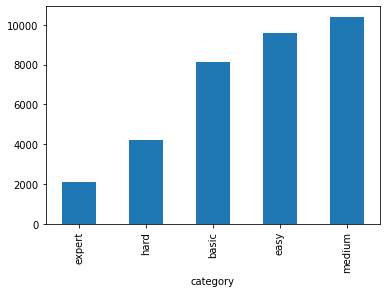

In [14]:
df.groupby('category').size().sort_values(ascending = True).plot(kind = 'bar')